In [30]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
df = pd.read_csv('./data/PassFail.csv')
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [4]:
len(df)

1000

In [5]:
df['Pass_Or_Fail'].value_counts()

0    501
1    499
Name: Pass_Or_Fail, dtype: int64

In [6]:
x = df.drop('Pass_Or_Fail',axis = 1)
y = df.Pass_Or_Fail

Text(0, 0.5, 'Second feature')

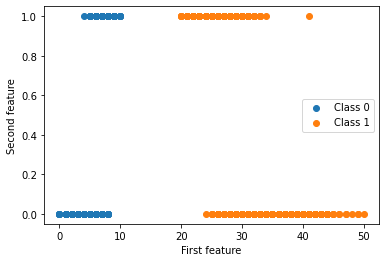

In [67]:
plt.scatter(x.iloc[:,0], y)
plt.scatter(x.iloc[:,1], y)
plt.legend(["Class 0", "Class 1"], loc="best")
plt.xlabel("First feature")
plt.ylabel("Second feature")


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

In [8]:
lr = LogisticRegression()

In [10]:
lr.fit(x_train,y_train)

LogisticRegression()

In [11]:
y_pred = lr.predict(x_test)

In [12]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy=",accuracy*100)

Test Accuracy= 96.8


In [13]:
traccuracy = metrics.accuracy_score(y_train, lr.predict(x_train))
print("Train Accuracy=",traccuracy*100)

Train Accuracy= 97.73333333333333


In [14]:
FF = lr.predict([[4,38]])
FF 

array([0])

In [15]:
SF = lr.predict((np.array([8, 29]).reshape(1, -1)))
SF 

array([1])

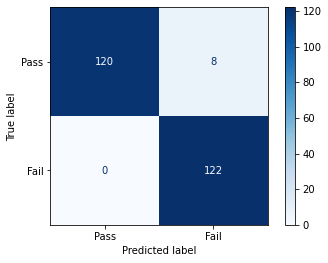

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, x_test, y_test,
                      display_labels=["Pass","Fail"],
                      cmap=plt.cm.Blues
                      )
plt.show()

In [28]:
import pickle
pickle.dump(lr,open('LRPF.sav','wb'))

In [29]:
load_model =pickle.load(open('LRPF.sav', 'rb'))

In [46]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)

In [47]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy=",accuracy*100)

Test Accuracy= 93.60000000000001


In [48]:
traccuracy = metrics.accuracy_score(y_train, tree_clf.predict(x_train))
print("Train Accuracy=",traccuracy*100)

Train Accuracy= 93.60000000000001


In [49]:
pickle.dump(tree_clf,open('DTPF.sav','wb'))

In [50]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)


SVC(kernel='linear')

In [51]:
y_pred=svmclf.predict(x_test)

In [52]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy=",accuracy*100)

Test Accuracy= 97.2


In [53]:
traccuracy = metrics.accuracy_score(y_train, svmclf.predict(x_train))
print("Train Accuracy=",traccuracy*100)

Train Accuracy= 97.73333333333333


In [54]:
pickle.dump(tree_clf,open('SVMPF.sav','wb'))